# Package Required

In [1]:
from scipy.misc import imread, imresize
from matplotlib import pyplot as plt
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from numpy import array
import numpy as np
import math
from PIL import Image, ImageDraw

# Read Image and Preprocessing

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(276, 363)


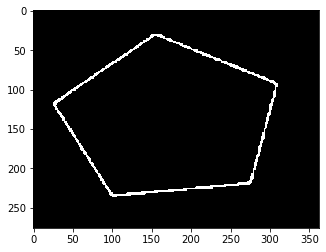

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
img = imread('W10LabData/binary.png')
gray= np.uint8(0.212670 * img[:,:,0] + 0.715160 * img[:,:,1] + 0.072169 * img[:,:,2])
gray[gray > 127] = 255
gray[gray < 128] = 0
binarized = gray
# dilation and erosion are applied multiple times to join the two parallel lines and also remove the jagging
binarized = binary_erosion(binary_erosion(binary_erosion(binary_dilation(binary_dilation(binarized)))))
print(binarized.shape)
plt.imshow(binarized, cmap='gray')
plt.show()


# Hough Transform (Week10 Lab Exercise Submission)

HoughTransform_Matrix.shape= (912, 62)


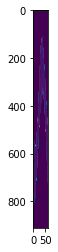

In [110]:
# Submission info - reply them with your name & unikey
studentname = 'Shuwei Zhang'
unikey = 'szha3901'

# TODO: Complete Hough Transform below (please refer to lab sheet for steps)
# some variable you may want to use: [binarized]

# create empty 2d array H
r_max = np.hypot(binarized.shape[0], binarized.shape[1])
r_dim = int(2 * r_max)
theta_dim = int(2*np.pi / 0.1)
H = np.zeros(shape = (r_dim , theta_dim))

#Apply Hough Transform to the binarised image
x_max, y_max  = binarized.shape
for x in range(x_max):
        for y in range(y_max):
            if binarized[x,y] == 0: continue
            for itheta in range(theta_dim):
                theta = itheta * 2 * np.pi / theta_dim
                r = int(x * math.sin(theta) + y * math.cos(theta))
                #increment value by 1 and plot the lines
                H[r,itheta] = H[r,itheta] + 1

#normalise H
for x in range(H.shape[0]):
    for y in range(H.shape[1]):
        H[x,y] = 256 * H[x,y] / np.amax(H)
#shift the graph to its correct place        
H = np.roll(H, int(r_max), axis = 0)


# support you name your hough_transfrom_matrix as [H], then you can do followings
print('HoughTransform_Matrix.shape=', H.shape)        
plt.imshow(H)
plt.show()

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


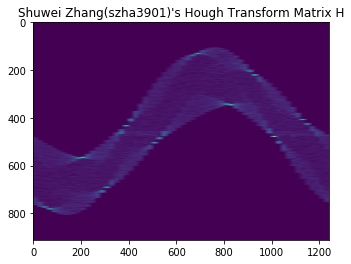

Please right click on the image generated above and save it for your submission.


In [111]:
def scale_H_for_visualization(H):
    # H is too thin to be visualized, so we prepared this function for you to rescale it for a better visualization result
    return imresize(H, (H.shape[0], H.shape[1] * 20))
plt.title("%s(%s)'s Hough Transform Matrix H"%(studentname, unikey))
plt.imshow(scale_H_for_visualization(H))
plt.show()
print("Please right click on the image generated above and save it for your submission.")

# Next Step: Line Detection

In [ ]:
# Complete your code here

# Extension: Inverse Hough Transform

In [ ]:
# Complete your code here